In [1]:
from keras.layers import Input, Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D,AveragePooling2D, BatchNormalization, PReLU, ReLU, SeparableConv2D
from keras.models import Model, Sequential
#from kerastuner.tuners import RandomSearch

In [ ]:
#!pip install keras-tuner -q

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   fill_mode='constant')

valid_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Wheat Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical'
                                                )

valid_set = valid_datagen.flow_from_directory('/content/drive/MyDrive/Wheat Disease/val',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical'
                                            , shuffle=False )

Found 2364 images belonging to 3 classes.
Found 588 images belonging to 3 classes.


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

valid_datagen = ImageDataGenerator(rescale = 1./255)


# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset2_split/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical'
                                                )

valid_set = valid_datagen.flow_from_directory('/content/drive/MyDrive/Dataset2_split/val',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical'
                                            , shuffle=False )

Found 4743 images belonging to 4 classes.
Found 1189 images belonging to 4 classes.


In [2]:
model=Sequential()

model.add(Conv2D(filters= 32,kernel_size = (5,5), padding='Same',activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(filters= 32,kernel_size = (5,5), padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters= 64,kernel_size = (3,3), padding='Same',activation='relu'))
model.add(Conv2D(filters= 64,kernel_size = (3,3), padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

In [3]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 17.6 MB/s eta 0:00:00


In [5]:
model=Sequential()

model.add(Conv2D(filters= 32,kernel_size = (5,5), padding='Same',activation='relu',input_shape=(256, 256,3)))
model.add(Conv2D(filters= 32,kernel_size = (5,5), padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters= 64,kernel_size = (3,3), padding='Same',activation='relu'))
model.add(Conv2D(filters= 64,kernel_size = (3,3), padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None, interpolation="nearest"))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))

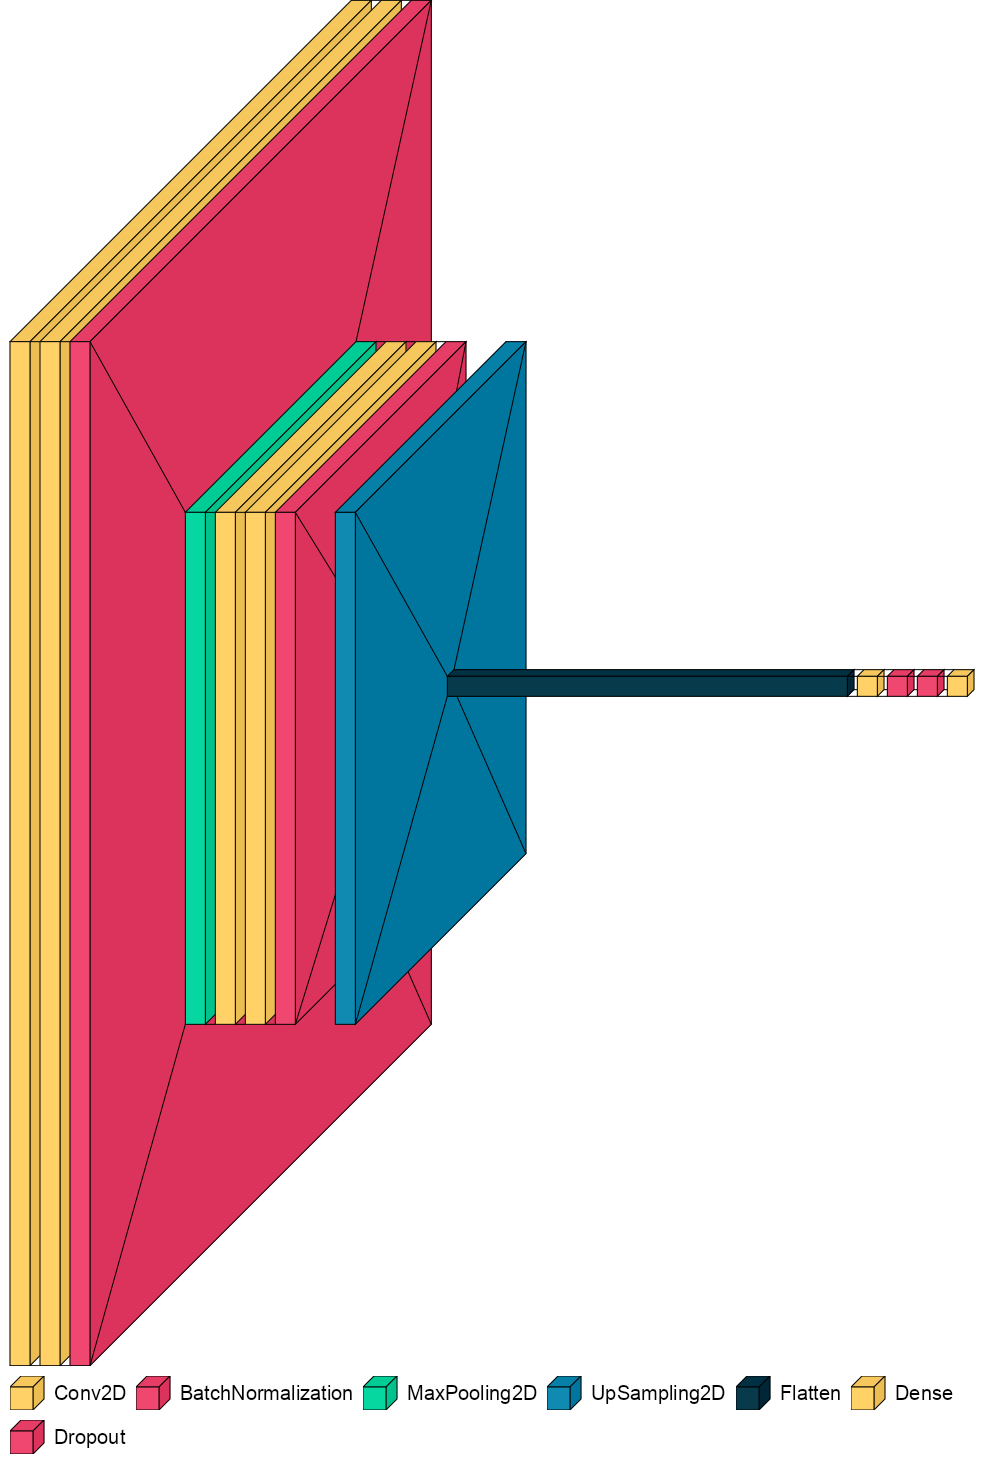

In [10]:
import tensorflow as tf
from tensorflow.keras import layers
import visualkeras

from numpy.core.fromnumeric import size
from PIL import ImageFont
font = ImageFont.truetype('/content/drive/MyDrive/arial.ttf', 20)
visualkeras.layered_view(model, legend=True,to_file='porposed_model.png', font=font)

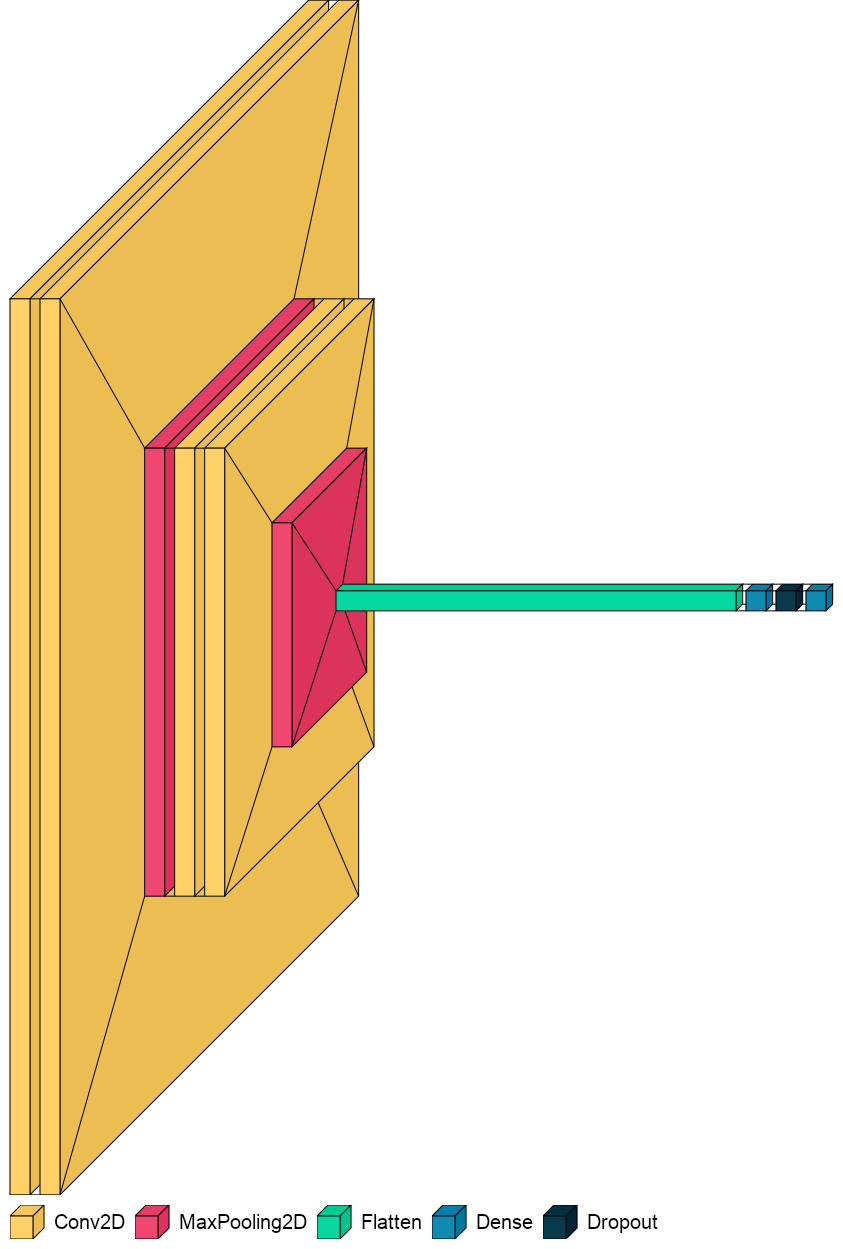

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import visualkeras

from numpy.core.fromnumeric import size
from PIL import ImageFont
font = ImageFont.truetype('/content/drive/MyDrive/arial.ttf', 20)
visualkeras.layered_view(model, legend=True,to_file='porposed_model.png', font=font)

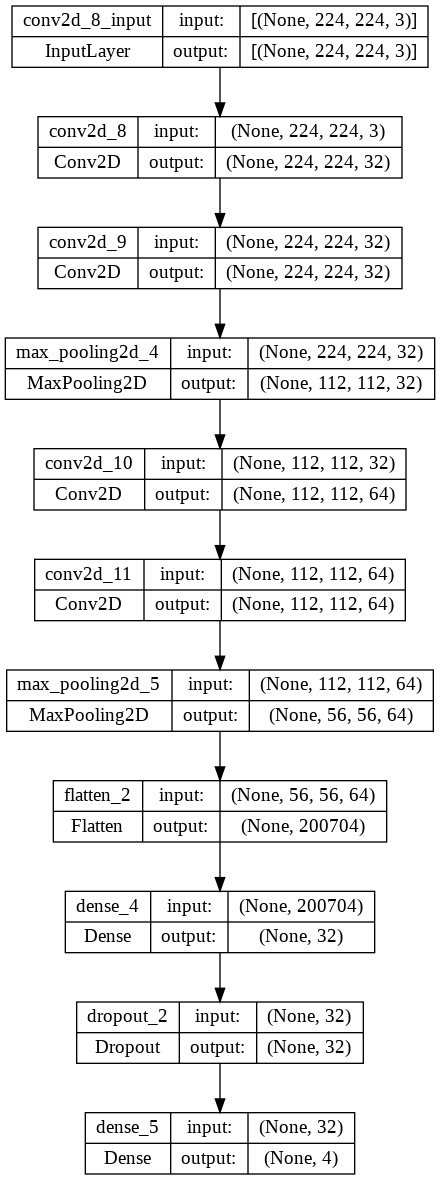

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

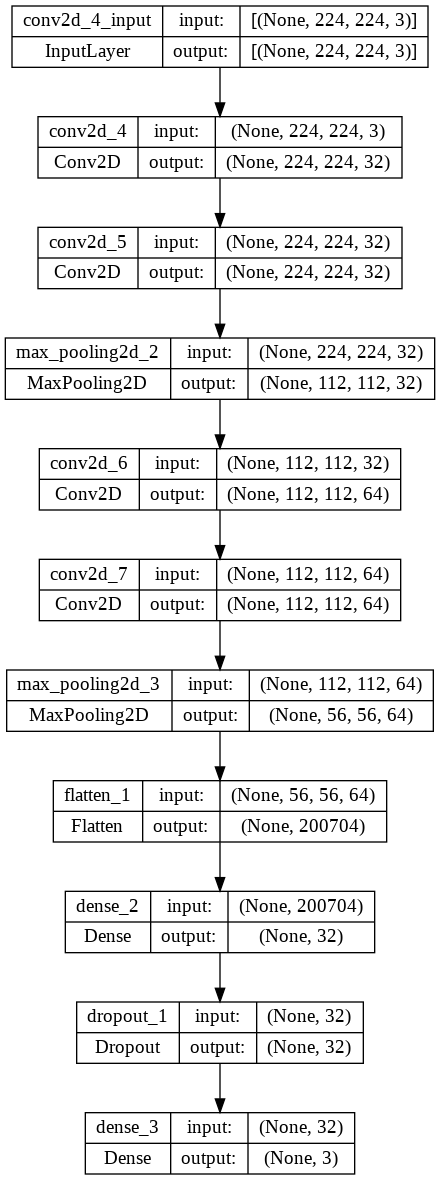

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot2.png', show_shapes=True, show_layer_names=True)

In [ ]:
import tensorflow as tf
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [ ]:
import time
import tensorflow as tf

# fit the model
# Run the cell. It will take some time to execute

start = time.time()

lrr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)



V1 = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set),
  callbacks=[lrr]
)

print('Running time: %.4f seconds' % (time.time()-start))

Epoch 1/30
75/75 [==============================] - 26s 341ms/step - loss: 1.3757 - accuracy: 0.3316 - val_loss: 1.2389 - val_accuracy: 0.4533 - lr: 0.0100
Epoch 2/30
75/75 [==============================] - 25s 337ms/step - loss: 1.1901 - accuracy: 0.4482 - val_loss: 1.0327 - val_accuracy: 0.6072 - lr: 0.0100
Epoch 3/30
75/75 [==============================] - 27s 357ms/step - loss: 1.1026 - accuracy: 0.5210 - val_loss: 0.9844 - val_accuracy: 0.6392 - lr: 0.0100
Epoch 4/30
75/75 [==============================] - 26s 349ms/step - loss: 1.0417 - accuracy: 0.5450 - val_loss: 0.8896 - val_accuracy: 0.6669 - lr: 0.0100
Epoch 5/30
75/75 [==============================] - 26s 339ms/step - loss: 0.9819 - accuracy: 0.5775 - val_loss: 0.8642 - val_accuracy: 0.6434 - lr: 0.0100
Epoch 6/30
75/75 [==============================] - 25s 338ms/step - loss: 0.9257 - accuracy: 0.6163 - val_loss: 1.0568 - val_accuracy: 0.4954 - lr: 0.0100
Epoch 7/30
75/75 [==============================] - 26s 342ms/st

In [ ]:
#Get the accuracy score v2
batch_size=64

test_score = model.evaluate_generator(valid_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

<ipython-input-147-2b7f4314e55b>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model.evaluate_generator(valid_set, batch_size)


[INFO] accuracy: 97.65%
[INFO] Loss:  0.10181881487369537


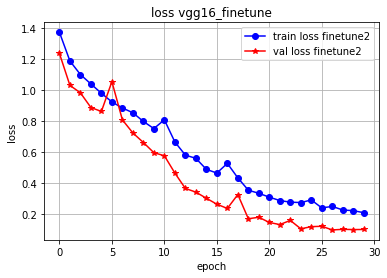

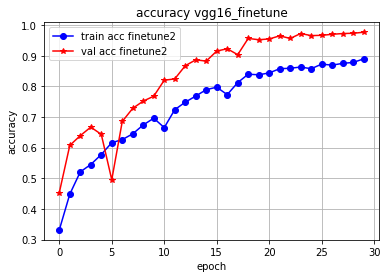

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(V1.history['loss'],'-o', color='b', label='train loss finetune2')
plt.plot(V1.history['val_loss'], '-*', color='r', label='val loss finetune2')


plt.legend()
plt.grid()
plt.title("loss vgg16_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(V1.history['accuracy'],'-o', color='b', label='train acc finetune2')
plt.plot(V1.history['val_accuracy'], '-*', color='r', label='val acc finetune2')

plt.legend()
plt.title("accuracy vgg16_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(valid_set)
y_pred=np.argmax(y_pred,axis=1)
test_y=valid_set.classes
#get classification report
target_names = ['1', '2','3','4']

print(classification_report(y_pred,test_y, target_names=target_names))

#get confusion matrix
print(confusion_matrix(y_pred,test_y ))

19/19 [==============================] - 4s 234ms/step
              precision    recall  f1-score   support

           1       0.97      0.98      0.97       315
           2       0.99      0.95      0.97       301
           3       0.97      0.99      0.98       313
           4       0.98      0.99      0.98       260

    accuracy                           0.98      1189
   macro avg       0.98      0.98      0.98      1189
weighted avg       0.98      0.98      0.98      1189

[[308   2   2   3]
 [  4 287   9   1]
 [  2   1 309   1]
 [  3   0   0 257]]


<ipython-input-148-df8e57aa5092>:35: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


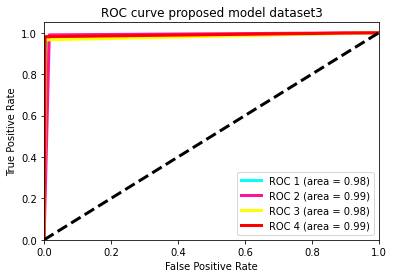

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Plot linewidth.
lw = 3
classes=np.unique(test_y)
n_classes=classes.shape[0]
y_test = label_binarize(test_y, classes=np.unique(test_y))
y_pred = label_binarize(y_pred, classes=np.unique(y_pred))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(),y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
class1=['1','2','3','4']
colors = cycle(['aqua','deeppink','yellow','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC {0} (area = {1:0.2f})'
             ''.format(class1[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve proposed model dataset3')
plt.legend(loc="lower right")
plt.show()


** **bold text**

In [ ]:
model=Sequential()

model.add(Conv2D(filters= 32,kernel_size = (5,5), padding='Same',activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(filters= 32,kernel_size = (5,5), padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters= 64,kernel_size = (3,3), padding='Same',activation='relu'))
model.add(Conv2D(filters= 64,kernel_size = (3,3), padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

** **bold text**

In [ ]:
model=Sequential()

model.add(Conv2D(filters= 32,kernel_size = (5,5), padding='Same',activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(filters= 32,kernel_size = (5,5), padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters= 64,kernel_size = (3,3), padding='Same',activation='relu'))
model.add(Conv2D(filters= 64,kernel_size = (3,3), padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

In [ ]:
import tensorflow as tf
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [ ]:
import time
import tensorflow as tf
start = time.time()

lrr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)

V1 = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set),
  callbacks=[lrr]
)

print('Running time: %.4f seconds' % (time.time()-start))

Epoch 1/30
37/37 [==============================] - 48s 1s/step - loss: 1.0639 - accuracy: 0.4158 - val_loss: 0.9879 - val_accuracy: 0.6582 - lr: 0.0100
Epoch 2/30
37/37 [==============================] - 47s 1s/step - loss: 1.0424 - accuracy: 0.4530 - val_loss: 0.9756 - val_accuracy: 0.7075 - lr: 0.0100
Epoch 3/30
37/37 [==============================] - 46s 1s/step - loss: 0.9785 - accuracy: 0.5182 - val_loss: 0.9090 - val_accuracy: 0.7364 - lr: 0.0100
Epoch 4/30
37/37 [==============================] - 47s 1s/step - loss: 1.0406 - accuracy: 0.4924 - val_loss: 0.9452 - val_accuracy: 0.6990 - lr: 0.0100
Epoch 5/30
37/37 [==============================] - 47s 1s/step - loss: 0.9043 - accuracy: 0.5690 - val_loss: 0.8200 - val_accuracy: 0.5595 - lr: 0.0100
Epoch 6/30
37/37 [==============================] - 46s 1s/step - loss: 0.7622 - accuracy: 0.6569 - val_loss: 0.6408 - val_accuracy: 0.7024 - lr: 0.0100
Epoch 7/30
37/37 [==============================] - 46s 1s/step - loss: 0.6477 - a

In [ ]:
#Get the accuracy score v2
batch_size=32

test_score = model.evaluate_generator(valid_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

<ipython-input-76-38147a2d7cb5>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model.evaluate_generator(valid_set, batch_size)


[INFO] accuracy: 94.05%
[INFO] Loss:  0.16121169924736023


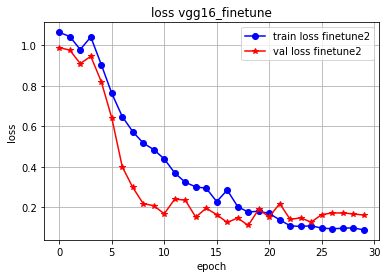

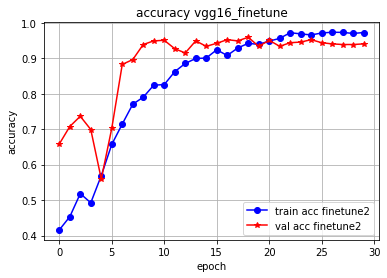

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(V1.history['loss'],'-o', color='b', label='train loss finetune2')
plt.plot(V1.history['val_loss'], '-*', color='r', label='val loss finetune2')


plt.legend()
plt.grid()
plt.title("loss vgg16_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(V1.history['accuracy'],'-o', color='b', label='train acc finetune2')
plt.plot(V1.history['val_accuracy'], '-*', color='r', label='val acc finetune2')

plt.legend()
plt.title("accuracy vgg16_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(valid_set)
y_pred=np.argmax(y_pred,axis=1)
test_y=valid_set.classes
#get classification report
target_names = ['1', '2','3']

print(classification_report(y_pred,test_y, target_names=target_names))

#get confusion matrix
print(confusion_matrix(y_pred,test_y ))

10/10 [==============================] - 6s 654ms/step
              precision    recall  f1-score   support

           1       0.99      0.89      0.93       201
           2       0.99      0.97      0.98       227
           3       0.84      0.97      0.90       160

    accuracy                           0.94       588
   macro avg       0.94      0.94      0.94       588
weighted avg       0.95      0.94      0.94       588

[[178   0  23]
 [  0 220   7]
 [  2   3 155]]


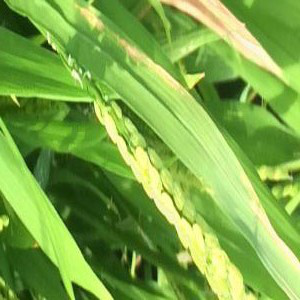

In [ ]:
import pandas as pd
from PIL import Image
image_path='/content/drive/MyDrive/Dataset2_split/val/Bacterialblight/BACTERAILBLIGHT3_005.jpg'
from keras_preprocessing.image import load_img,img_to_array
img = load_img(image_path, target_size=(224,224,3)) # stores image in PIL format
image_array=img_to_array(img)
display(Image.open(image_path))

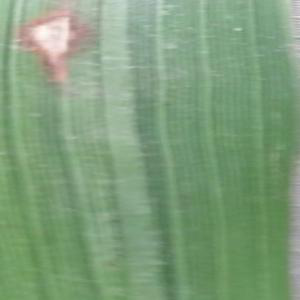

In [ ]:

import pandas as pd
from PIL import Image
image_path='/content/drive/MyDrive/Dataset2_split/val/Blast/BLAST1_005.jpg'
from keras_preprocessing.image import load_img,img_to_array
img = load_img(image_path, target_size=(224,224,3)) # stores image in PIL format
image_array=img_to_array(img)
display(Image.open(image_path))

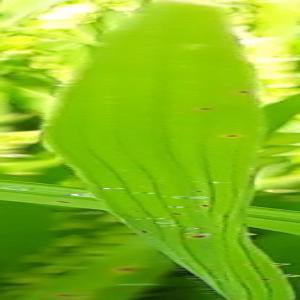

In [ ]:


import pandas as pd
from PIL import Image
image_path='/content/drive/MyDrive/Dataset2_split/val/Brownspot/BROWNSPOT1_005.jpg'
from keras_preprocessing.image import load_img,img_to_array
img = load_img(image_path, target_size=(224,224,3)) # stores image in PIL format
image_array=img_to_array(img)
display(Image.open(image_path))

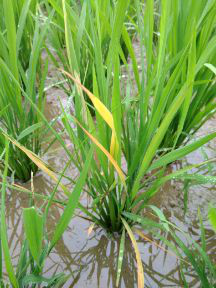

In [ ]:

import pandas as pd
from PIL import Image
image_path='/content/drive/MyDrive/Dataset2_split/val/Tungro/TUNGRO1_005.jpg'
from keras_preprocessing.image import load_img,img_to_array
img = load_img(image_path, target_size=(224,224,3)) # stores image in PIL format
image_array=img_to_array(img)
display(Image.open(image_path))

<ipython-input-88-3a7eab62f629>:35: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


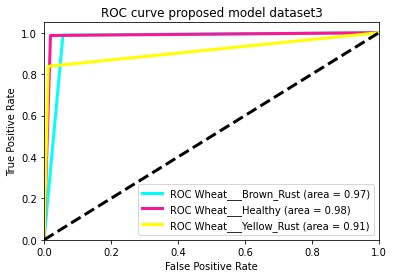

In [ ]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Plot linewidth.
lw = 3
classes=np.unique(test_y)
n_classes=classes.shape[0]
y_test = label_binarize(test_y, classes=np.unique(test_y))
y_pred = label_binarize(y_pred, classes=np.unique(y_pred))
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(),y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
class1=['Wheat___Brown_Rust','Wheat___Healthy','Wheat___Yellow_Rust']
colors = cycle(['aqua','deeppink','yellow'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC {0} (area = {1:0.2f})'
             ''.format(class1[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve proposed model dataset3')
plt.legend(loc="lower right")
plt.show()


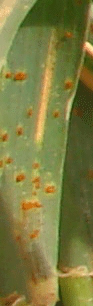

In [ ]:
import pandas as pd
from PIL import Image
image_path='/content/drive/MyDrive/Wheat Disease/val/Wheat___Brown_Rust/Brown_rust1004.jpg'
from keras_preprocessing.image import load_img,img_to_array
img = load_img(image_path, target_size=(224,224,3)) # stores image in PIL format
image_array=img_to_array(img)
display(Image.open(image_path))

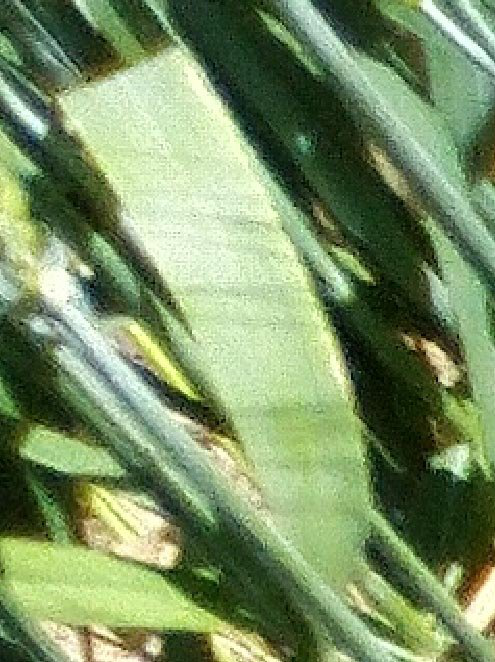

In [ ]:
import pandas as pd
from PIL import Image
image_path='/content/drive/MyDrive/Wheat Disease/val/Wheat___Healthy/Healthy1129.jpg'
from keras_preprocessing.image import load_img,img_to_array
img = load_img(image_path, target_size=(224,224,3)) # stores image in PIL format
image_array=img_to_array(img)
display(Image.open(image_path))

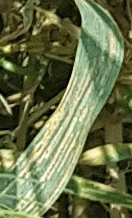

In [ ]:
import pandas as pd
from PIL import Image
image_path='/content/drive/MyDrive/Wheat Disease/val/Wheat___Yellow_Rust/Yellow_rust947.jpg'
from keras_preprocessing.image import load_img,img_to_array
img = load_img(image_path, target_size=(224,224,3)) # stores image in PIL format
image_array=img_to_array(img)
display(Image.open(image_path))

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions

    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.layers[-2].output])

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()           

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 224, 224, 32)      2432      
                                                                 
 conv2d_78 (Conv2D)          (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_80 (Conv2D)          (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


In [ ]:
import sys

img_size = (224, 224)

myFile ='/content/drive/MyDrive/Dataset2_split/val/Brownspot/BROWNSPOT1_005.jpg'
fullPath = os.path.abspath("./" + myFile)  # or similar, depending on your scenario
img_path = keras.utils.get_file(myFile, 'file://'+fullPath)


In [ ]:
img_array = get_img_array(img_path, size=img_size)

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", (preds))


1/1 [==============================] - 0s 15ms/step
Predicted: [[0. 0. 1. 0.]]


In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_115 (Conv2D)         (None, 224, 224, 32)      2432      
                                                                 
 conv2d_116 (Conv2D)         (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_117 (Conv2D)         (None, 112, 112, 64)      18496     
                                                                 
 conv2d_118 (Conv2D)         (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 56, 56, 64)       0         
 g2D)                                                

In [ ]:
sparsified_weights = []
for w in model.get_layer(name='conv2d_118').get_weights():
    sparsified_weights.append(w)

In [ ]:
x = (model.layers[-6].output)
x = MaxPooling2D()(x)
x = Flatten()(x)
x = Dense(units=32, activation='relu')(x)
x = Dropout(0.5)(x)
output  = Dense(units=3, activation='softmax')(x)
new_model= Model(model.input, output)

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
new_VGG16_model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [ ]:
#transfer weat
import time
import tensorflow as tf

# fit the model
# Run the cell. It will take some time to execute

start = time.time()

lrr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)



V1 = new_model.fit(
  training_set,
  validation_data=valid_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set),
  callbacks=[lrr]
)

print('Running time: %.4f seconds' % (time.time()-start))

RuntimeError: ignored

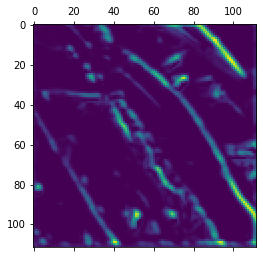

In [ ]:
# Make model
model = model
last_conv_layer_name ="conv2d_118"
# Remove last layer's softmax
model.layers[-1].activation = None

img_array=np.expand_dims(image_array, axis=0)
# Prepare particular image 

# Generate class activation heatmap
heatmap= make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

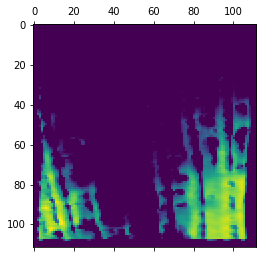

In [ ]:
# Make model
model = model
last_conv_layer_name ="conv2d_118"
# Remove last layer's softmax
model.layers[-1].activation = None

img_array=np.expand_dims(image_array, axis=0)
# Prepare particular image 

# Generate class activation heatmap
heatmap= make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

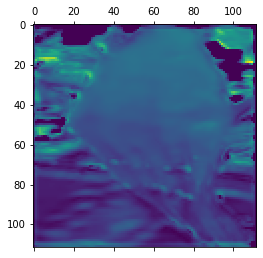

In [ ]:
# Make model
model = model
last_conv_layer_name ="conv2d_118"
# Remove last layer's softmax
model.layers[-1].activation = None

img_array=np.expand_dims(image_array, axis=0)
# Prepare particular image 

# Generate class activation heatmap
heatmap= make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

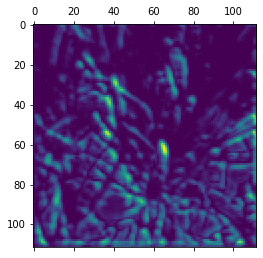

In [ ]:
# Make model
model = model
last_conv_layer_name ="conv2d_118"
# Remove last layer's softmax
model.layers[-1].activation = None

img_array=np.expand_dims(image_array, axis=0)
# Prepare particular image 

# Generate class activation heatmap
heatmap= make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

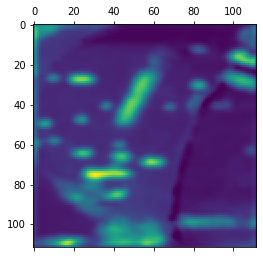

In [ ]:
# Make model
model = model
last_conv_layer_name ="conv2d_80"
# Remove last layer's softmax
model.layers[-1].activation = None

img_array=np.expand_dims(image_array, axis=0)
# Prepare particular image 

# Generate class activation heatmap
heatmap= make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

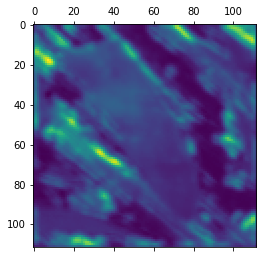

In [ ]:
# Make model
model = model
last_conv_layer_name ="conv2d_80"
# Remove last layer's softmax
model.layers[-1].activation = None

img_array=np.expand_dims(image_array, axis=0)
# Prepare particular image 

# Generate class activation heatmap
heatmap= make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

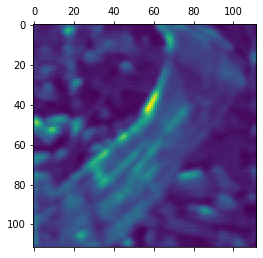

In [ ]:
# Make model
model = model
last_conv_layer_name ="conv2d_80"
# Remove last layer's softmax
model.layers[-1].activation = None

img_array=np.expand_dims(image_array, axis=0)
# Prepare particular image 

# Generate class activation heatmap
heatmap= make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [ ]:
import matplotlib.cm as cm
def save_and_display_gradcam(img_path, heatmap, cam_path, alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image.open(cam_path))

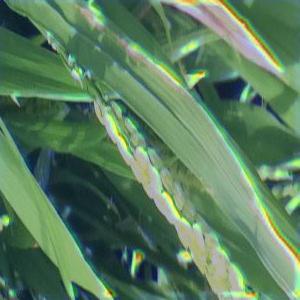

In [ ]:
save_and_display_gradcam(image_path, heatmap,cam_path="/content/drive/MyDrive/Kaggle/GradCamTest4.jpg")

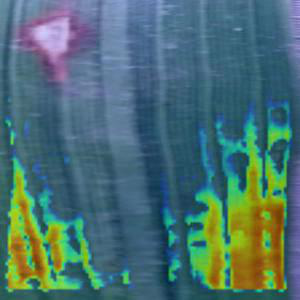

In [ ]:
save_and_display_gradcam(image_path, heatmap,cam_path="/content/drive/MyDrive/Kaggle/GradCamTest4.jpg")

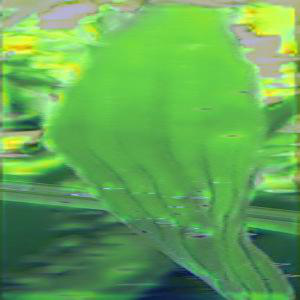

In [ ]:
save_and_display_gradcam(image_path, heatmap,cam_path="/content/drive/MyDrive/Kaggle/GradCamTest5.jpg")

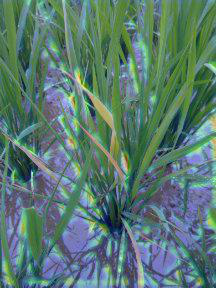

In [ ]:
save_and_display_gradcam(image_path, heatmap,cam_path="/content/drive/MyDrive/Kaggle/GradCamTest8.jpg")

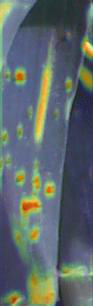

In [ ]:
save_and_display_gradcam(image_path, heatmap,cam_path="/content/drive/MyDrive/Kaggle/GradCamTest1.jpg")

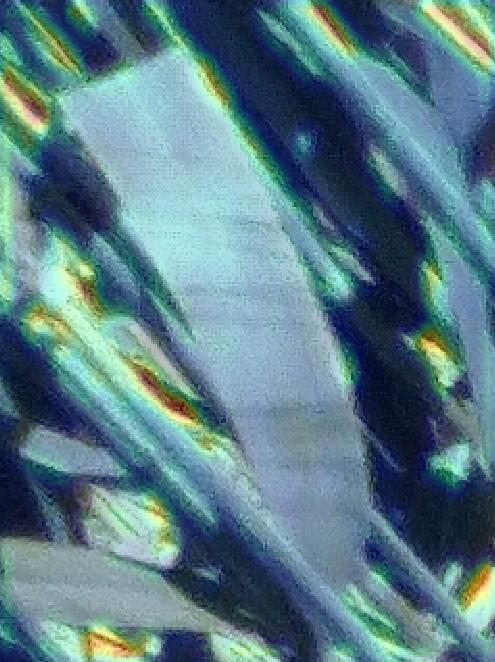

In [ ]:
save_and_display_gradcam(image_path, heatmap,cam_path="/content/drive/MyDrive/Kaggle/GradCamTest2.jpg")

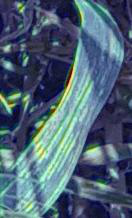

In [ ]:
save_and_display_gradcam(image_path, heatmap,cam_path="/content/drive/MyDrive/Kaggle/GradCamTest3.jpg")

In [ ]:
import time
import tensorflow as tf
start = time.time()

lrr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)

V1 = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set),
  callbacks=[lrr]
)

print('Running time: %.4f seconds' % (time.time()-start))

Epoch 1/30
74/74 [==============================] - 50s 673ms/step - loss: 1.1119 - accuracy: 0.3926 - val_loss: 1.0783 - val_accuracy: 0.5493 - lr: 0.0100
Epoch 2/30
74/74 [==============================] - 47s 638ms/step - loss: 1.0370 - accuracy: 0.4670 - val_loss: 0.9798 - val_accuracy: 0.3793 - lr: 0.0100
Epoch 3/30
74/74 [==============================] - 47s 639ms/step - loss: 0.9047 - accuracy: 0.6113 - val_loss: 0.6756 - val_accuracy: 0.5578 - lr: 0.0100
Epoch 4/30
74/74 [==============================] - 48s 642ms/step - loss: 0.7250 - accuracy: 0.6971 - val_loss: 0.4664 - val_accuracy: 0.7891 - lr: 0.0100
Epoch 5/30
74/74 [==============================] - 47s 632ms/step - loss: 0.5882 - accuracy: 0.7720 - val_loss: 0.3431 - val_accuracy: 0.8878 - lr: 0.0100
Epoch 6/30
74/74 [==============================] - 47s 635ms/step - loss: 0.5101 - accuracy: 0.8084 - val_loss: 0.2927 - val_accuracy: 0.8946 - lr: 0.0100
Epoch 7/30
74/74 [==============================] - 47s 632ms/st

In [ ]:
#Get the accuracy score v2
batch_size=32

test_score = model.evaluate_generator(valid_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

<ipython-input-45-38147a2d7cb5>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model.evaluate_generator(valid_set, batch_size)


[INFO] accuracy: 93.20%
[INFO] Loss:  0.17455260455608368


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(valid_set)
y_pred=np.argmax(y_pred,axis=1)
test_y=valid_set.classes
#get classification report
target_names = ['1', '2','3']

print(classification_report(y_pred,test_y, target_names=target_names))

#get confusion matrix
print(confusion_matrix(y_pred,test_y ))

19/19 [==============================] - 5s 245ms/step
              precision    recall  f1-score   support

           1       0.99      0.88      0.93       202
           2       0.97      0.97      0.97       223
           3       0.83      0.94      0.89       163

    accuracy                           0.93       588
   macro avg       0.93      0.93      0.93       588
weighted avg       0.94      0.93      0.93       588

[[178   0  24]
 [  0 216   7]
 [  2   7 154]]


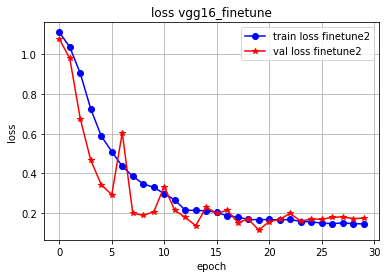

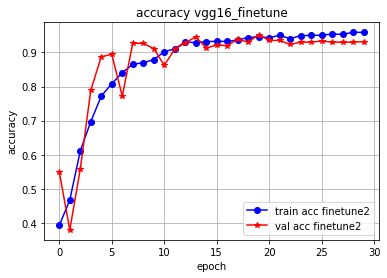

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(V1.history['loss'],'-o', color='b', label='train loss finetune2')
plt.plot(V1.history['val_loss'], '-*', color='r', label='val loss finetune2')


plt.legend()
plt.grid()
plt.title("loss vgg16_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(V1.history['accuracy'],'-o', color='b', label='train acc finetune2')
plt.plot(V1.history['val_accuracy'], '-*', color='r', label='val acc finetune2')

plt.legend()
plt.title("accuracy vgg16_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

**executed**

*   List item\:::
*   List item



In [ ]:
model=Sequential()

model.add(Conv2D(filters= 64,kernel_size = (7,7),strides=(2,2) ,padding='Same',activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(filters= 64,kernel_size = (3,3),strides=(1,1), padding='Same',activation='relu'))
model.add(Conv2D(filters= 128,kernel_size = (3,3),strides=(1,1), padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters= 128,kernel_size = (3,3),strides=(1,1), padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters= 128,kernel_size = (3,3),strides=(1,1), padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

In [ ]:
import tensorflow as tf
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      9472      
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 128)      0         
 2D)                                                  

In [ ]:
import time
import tensorflow as tf
start = time.time()

lrr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)

V1 = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set),
  callbacks=[lrr]
)

print('Running time: %.4f seconds' % (time.time()-start))

Epoch 1/5
74/74 [==============================] - 54s 688ms/step - loss: 1.0637 - accuracy: 0.4171 - val_loss: 0.9309 - val_accuracy: 0.4218 - lr: 0.0100
Epoch 2/5
74/74 [==============================] - 47s 634ms/step - loss: 0.9957 - accuracy: 0.5038 - val_loss: 0.9971 - val_accuracy: 0.5612 - lr: 0.0100
Epoch 3/5
74/74 [==============================] - 46s 624ms/step - loss: 0.9171 - accuracy: 0.5698 - val_loss: 0.6920 - val_accuracy: 0.7109 - lr: 0.0100
Epoch 4/5
74/74 [==============================] - 46s 624ms/step - loss: 0.7742 - accuracy: 0.6531 - val_loss: 0.7066 - val_accuracy: 0.6922 - lr: 0.0100
Epoch 5/5
74/74 [==============================] - 48s 641ms/step - loss: 0.7047 - accuracy: 0.6878 - val_loss: 0.6476 - val_accuracy: 0.7177 - lr: 0.0100
Running time: 241.3936 seconds


In [ ]:
ConvNeXtTiny

In [ ]:
# -*- coding: utf-8 -*-
import os
import tensorflow as tf #tf 2.0.0
tf.keras.applications.EfficientNetV2L
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

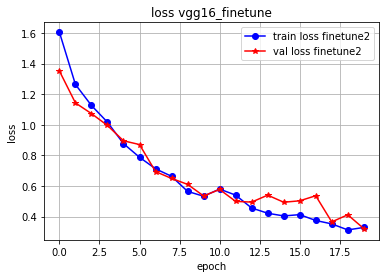

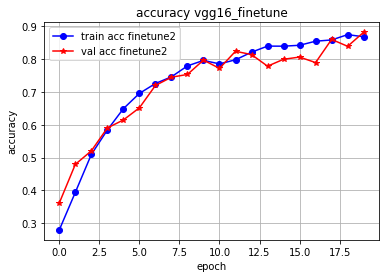

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(V1.history['loss'],'-o', color='b', label='train loss finetune2')
plt.plot(V1.history['val_loss'], '-*', color='r', label='val loss finetune2')


plt.legend()
plt.grid()
plt.title("loss vgg16_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(V1.history['accuracy'],'-o', color='b', label='train acc finetune2')
plt.plot(V1.history['val_accuracy'], '-*', color='r', label='val acc finetune2')

plt.legend()
plt.title("accuracy vgg16_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(valid_set)
y_pred=np.argmax(y_pred,axis=1)
test_y=valid_set.classes
#get classification report
target_names = ['Bacterialblight', 'Blast','Brownspot','Tungro']

print(classification_report(y_pred,test_y, target_names=target_names))

#get confusion matrix
print(confusion_matrix(y_pred,test_y ))

19/19 [==============================] - 5s 239ms/step
                 precision    recall  f1-score   support

Bacterialblight       0.92      0.80      0.86       366
          Blast       0.79      0.90      0.84       254
      Brownspot       0.89      0.87      0.88       327
         Tungro       0.92      1.00      0.96       242

       accuracy                           0.88      1189
      macro avg       0.88      0.89      0.89      1189
   weighted avg       0.89      0.88      0.88      1189

[[292  44  18  12]
 [  7 229  16   2]
 [ 18  17 286   6]
 [  0   0   0 242]]


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -U mxnet-cu101==1.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |███████████████████████████████▌| 834.1 MB 1.2 MB/s eta 0:00:10tcmalloc: large alloc 1147494400 bytes == 0x3aaca000 @  0x7fc167c37615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x4fd8b5 0x4997c7 0x4fd8b5 0x49abe4 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x4f5fe9 0x55e146 0x5d8868 0x5da092 0x587116 0x5d8d8c 0x55dc1e 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4990ca 0x5d8868 0x4997a2 0x4fd8b5 0x49abe4
     |████████████████████████████████| 846.0 MB 22 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
!nvidia-smi

Sun Dec 11 16:15:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    25W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------